# Agent Testing Notebook

This notebook is for testing the `LangGraphAgent` with different agent architectures.

## Setup

In [2]:
from langserve import add_routes 

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults
import os
from dotenv import load_dotenv
load_dotenv()
from typing import Any, Callable, List, Optional, cast, Dict, Literal, Union
from pydantic import BaseModel, Field, field_validator
from langchain.tools import BaseTool, tool
from langchain_core.language_models import BaseChatModel
from src.langgraph.app.core.langgraph.deepagents import DeepResearchAgent 
from src.langgraph.app.core.langgraph.smolagent import SMOLAgent
from langgraph.checkpoint.memory import MemorySaver
from langchain_openai import ChatOpenAI
import asyncio
import os
import logging
from typing import List, Sequence, TypedDict, Annotated, Optional, Dict, Any

from dotenv import load_dotenv
from langchain_core.language_models.base import BaseLanguageModel
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.base import BaseCheckpointSaver
from langgraph.graph.message import add_messages
from langgraph.graph.state import CompiledStateGraph
from langgraph.managed import RemainingSteps

# Local application imports
from src.langgraph.app.core.langgraph.agents import create_agent
from src.langgraph.app.core.langgraph.smolagent import SMOLAgent
# from src.langgraph.app.core.langgraph.toolsagent import ToolsAgent
from src.langgraph.app.core.langgraph.deepagents import DeepResearchAgent
from src.langgraph.app.core.langgraph.swarm import SwarmState, create_handoff_tool, create_swarm


llm = ChatOpenAI(model="gpt-4.1", temperature=0)
selector_llm = ChatOpenAI(model="gpt-4.1", temperature=0)

memory = MemorySaver()

In [ ]:
import copy

## 1. Base Agent Test

In [ ]:

from src.langgraph.app.core.langgraph import MORGANA

agent = DeepResearchAgent(
    llm=llm,
    checkpointer=memory
)
my_agent = await agent.build()


DeepResearchAgent factory initialized.
Building the deep research agent executor...
Building the deep research agent executor...
Deep research agent executor built successfully.
Deep research agent executor built successfully.


Starting new HTTPS connection (1): mermaid.ink:443
https://mermaid.ink:443 "GET /img/LS0tCmNvbmZpZzoKICBmbG93Y2hhcnQ6CiAgICBjdXJ2ZTogbGluZWFyCi0tLQpncmFwaCBURDsKCV9fc3RhcnRfXyhbPHA+X19zdGFydF9fPC9wPl0pOjo6Zmlyc3QKCWFnZW50KGFnZW50KQoJdG9vbHModG9vbHMpCglfX2VuZF9fKFs8cD5fX2VuZF9fPC9wPl0pOjo6bGFzdAoJX19zdGFydF9fIC0tPiBhZ2VudDsKCWFnZW50IC0uLT4gX19lbmRfXzsKCWFnZW50IC0uLT4gdG9vbHM7Cgl0b29scyAtLT4gYWdlbnQ7CgljbGFzc0RlZiBkZWZhdWx0IGZpbGw6I2YyZjBmZixsaW5lLWhlaWdodDoxLjIKCWNsYXNzRGVmIGZpcnN0IGZpbGwtb3BhY2l0eTowCgljbGFzc0RlZiBsYXN0IGZpbGw6I2JmYjZmYwo=?type=png&bgColor=!white HTTP/1.1" 200 9431
https://mermaid.ink:443 "GET /img/LS0tCmNvbmZpZzoKICBmbG93Y2hhcnQ6CiAgICBjdXJ2ZTogbGluZWFyCi0tLQpncmFwaCBURDsKCV9fc3RhcnRfXyhbPHA+X19zdGFydF9fPC9wPl0pOjo6Zmlyc3QKCWFnZW50KGFnZW50KQoJdG9vbHModG9vbHMpCglfX2VuZF9fKFs8cD5fX2VuZF9fPC9wPl0pOjo6bGFzdAoJX19zdGFydF9fIC0tPiBhZ2VudDsKCWFnZW50IC0uLT4gX19lbmRfXzsKCWFnZW50IC0uLT4gdG9vbHM7Cgl0b29scyAtLT4gYWdlbnQ7CgljbGFzc0RlZiBkZWZhdWx0IGZpbGw6I2YyZjBmZixsaW5lLWhlaWdodDoxL

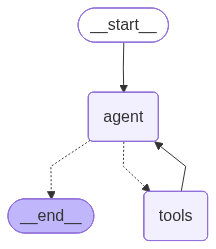

In [ ]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        my_agent.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [ ]:

# 4. Define the research task and run the agent
thread_config = {"configurable": {"thread_id": "deep-research-thread-11thronee1"}}
# query = "Do a deep research on central oklahoma city, OKlahoma. Find me the best places to eat, drink, and have fun. Provide me with a detailed report. Make sure this is central oklahoma city, and not just anywhere in oklahoma city."

query = """
Do a deep research on agentech in oklahoma city
"""

initial_input = {"messages": [HumanMessage(content=query)]}

print(f"--- Running Deep Research Agent for query: '{query}' ---")

# The .invoke() method is synchronous and works here because my_agent is now correctly instantiated.
# Note: Your main() example used astream_events for streaming, which is also a great option.
result = my_agent.invoke(initial_input, config=thread_config)

# The final output structure might vary, adjust this key if needed.
if result.get('messages') and isinstance(result['messages'], list) and len(result['messages']) > 1:
        final_report_content = result['messages'][-1].content
        # Assuming the report is in the content of the last message
        print("\n--- FINAL REPORT ---")
        print(final_report_content)
else:
        print("Could not find final report in the result.")
        print(result)




--- Running Deep Research Agent for query: '
Do a deep research on agentech in oklahoma city
' ---



c:\Users\pault\anaconda3\envs\app_project\Lib\site-packages\langsmith\client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


Starting new HTTPS connection (1): api.smith.langchain.com:443
Request options: {'method': 'post', 'url': '/chat/completions', 'headers': {'X-Stainless-Raw-Response': 'true'}, 'files': None, 'idempotency_key': 'stainless-python-retry-605845ac-1632-4446-8fcd-256bfbe454a8', 'json_data': {'messages': [{'content': 'You are an expert researcher. Your job is to conduct thorough research, and then write a polished report.\n\nThe first thing you should do is to write the original user question to `question.txt` so you have a record of it.\n\nUse the research-agent to conduct deep research. It will respond to your questions/topics with a detailed answer.\n\nWhen you think you enough information to write a final report, write it to `final_report.md`\n\nYou can call the critique-agent to get a critique of the final report. After that (if needed) you can do more research and edit the `final_report.md`\nYou can do this however many times you want until are you satisfied with the result.\n\nOnly edi

Sending compressed multipart request with context: trace=c8d52d34-2aa2-4834-9b25-eef17aa0c76c,id=11603a8e-c5b2-476a-9735-e06bfbefb5f5; trace=c8d52d34-2aa2-4834-9b25-eef17aa0c76c,id=9fe43737-9328-4fbe-a706-febbf78fb2f0; trace=c8d52d34-2aa2-4834-9b25-eef17aa0c76c,id=c00cb7fe-2cdd-4e7d-86b5-dcb0dd34f5f8; trace=c8d52d34-2aa2-4834-9b25-eef17aa0c76c,id=738eb1b2-24ff-4d90-aac5-83601cc3d43b; trace=c8d52d34-2aa2-4834-9b25-eef17aa0c76c,id=738eb1b2-24ff-4d90-aac5-83601cc3d43b; trace=c8d52d34-2aa2-4834-9b25-eef17aa0c76c,id=35b035ca-18f6-42c4-a991-9c43292d933e; trace=c8d52d34-2aa2-4834-9b25-eef17aa0c76c,id=c8d52d34-2aa2-4834-9b25-eef17aa0c76c
https://api.smith.langchain.com:443 "POST /runs/multipart HTTP/1.1" 401 25
https://api.smith.langchain.com:443 "POST /runs/multipart HTTP/1.1" 401 25
Failed to send compressed multipart ingest: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https:/

In [ ]:
result

{'messages': [HumanMessage(content='\nDo a deep research on agentech in oklahoma city\n', additional_kwargs={}, response_metadata={}, id='f41be259-39a1-493e-9cfa-eb1d794a96c0'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_8SZXwG5bu8C74VWwtwK9JhXQ', 'function': {'arguments': '{"file_path":"question.txt","content":"Do a deep research on agentech in oklahoma city"}', 'name': 'write_file'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 5356, 'total_tokens': 5386, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_daf5fcc80a', 'id': 'chatcmpl-CGszIBxgTadiAwhrlCuOFsTlCo8Fm', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--cd4c7b8b-6877-4ca9-a26e

In [ ]:
print(result['messages'][-1].content)

The research and report on Agentech in Oklahoma City is complete. The final report is well-structured and comprehensive, but a critique has suggested several improvements for even greater depth and balance. If you would like, I can revise the report to include more market context, technical details, customer impact, and a more balanced analysis, as well as enhance the citations and narrative flow. Let me know if you want an updated version or if you have specific areas you'd like to focus on!



In [ ]:
import nest_asyncio

# Streaming agent output using LangGraph's recommended "messages" mode
print(f"--- Streaming Deep Research Agent for query: '{query}' ---")

async def stream_agent_messages():
    # Use "messages" mode for token-by-token streaming
    async for chunk, metadata in my_agent.astream(initial_input, config=thread_config, stream_mode="messages"):
        # Print only non-empty tokens
        if hasattr(chunk, "content") and chunk.content:
            print(chunk.content, end="", flush=True)

nest_asyncio.apply()
await stream_agent_messages()

--- Streaming Deep Research Agent for query: 'Do a deep research on central oklahoma city, OKlahoma. Find me the best places to eat, drink, and have fun. Provide me with a detailed report. Make sure this is central oklahoma city, and not just anywhere in oklahoma city.' ---

Request options: {'method': 'post', 'url': '/chat/completions', 'files': None, 'idempotency_key': 'stainless-python-retry-bb9d7fcb-fdce-4459-8706-f6219148c386', 'json_data': {'messages': [{'content': "You are a highly intelligent AI agent designed to assist users by leveraging a variety of tools and resources. Your primary goal is to understand the user's needs and provide accurate, relevant, and timely information or actions based on the tools at your disposal.\nYou have access to the following tools:\n\n", 'role': 'system'}, {'content': 'Do a deep research on central oklahoma city, OKlahoma. Find me the best places to eat, drink, and have fun. Provide me with a detailed report. Make sure this is central oklahoma 

## 2. Testing LangraphAgent class

In [ ]:
from src.langgraph.app.core.langgraph import LangGraphAgent, MORGANA
import uuid
from src.langgraph.app.schemas import (
    GraphState,
    Message,
)
import asyncio
import nest_asyncio
nest_asyncio.apply()

In [ ]:
# This is a common pattern for testing code with global dependencies.

# ==============================================================================
# >> STEP 2: DEFINE THE ASYNCHRONOUS TEST RUNNER
# ==============================================================================

async def run_agent_tests():
    """
    An asynchronous function to instantiate and test all
    methods of the LangGraphAgent class.
    """
    print("\n--- 2. INSTANTIATING LANGGRAPH AGENT ---")
    agent = LangGraphAgent()
    
    # Generate a unique session ID for this test run to keep the conversation isolated
    session_id = f"test-session-{uuid.uuid4()}"
    user_id = "test-user-1234"
    print(f"Using Session ID: {session_id}")
    
    # --------------------------------------------------------------------------
    # >> TEST 1: Get Response (Non-Streaming)
    # --------------------------------------------------------------------------
    print("\n--- 3. TESTING get_response (NON-STREAMING) ---")
    
    # This is a complex query perfect for a multi-agent system
    query1 = "What's the current weather in Norman, Oklahoma? Based on that, find a highly-rated coffee shop nearby."
    
    messages = [Message(role="user", content=query1)]

    try:
        response = await agent.get_response(messages, session_id, user_id)
        print("\n[SUCCESS] Agent's Final Response:")
        # The response is a list of dictionaries, we'll print the last one
        if response:
            print(response[-1]['content'])
        else:
            print("Agent returned an empty response.")
    except Exception as e:
        print(f"\n[FAILURE] An error occurred during get_response: {e}")


    # --------------------------------------------------------------------------
    # >> TEST 2: Get Stream Response (Streaming)
    # --------------------------------------------------------------------------
    print("\n--- 4. TESTING get_stream_response (STREAMING) ---")
    
    # Continue the conversation in the same session
    query2 = "Great. Now, where's a good place to go out tonight?"
    
    # The 'messages' list should include the history for context
    messages.append(Message(role="assistant", content="...")) # Placeholder for previous AI response
    messages.append(Message(role="user", content=query2))
    
    print("\n[SUCCESS] Agent's Streaming Response:")
    full_streamed_response = ""
    try:
        async for token in agent.get_stream_response(messages, session_id, user_id):
            print(token, end="", flush=True)
            full_streamed_response += token
        print("\n--- End of Stream ---")
    except Exception as e:
        print(f"\n[FAILURE] An error occurred during get_stream_response: {e}")

    # --------------------------------------------------------------------------
    # >> TEST 3: Get Chat History
    # --------------------------------------------------------------------------
    print("\n--- 5. TESTING get_chat_history ---")
    print("Fetching history to verify the conversation was saved by the checkpointer...")
    
    try:
        history = await agent.get_chat_history(session_id)
        if history:
            print("\n[SUCCESS] Retrieved Chat History:")
            for msg in history:
                print(f"- {msg.role.capitalize()}: {msg.content[:100]}...") # Print first 100 chars
            assert len(history) > 1, "History should contain more than one message."
        else:
            print("\n[WARNING] Chat history is empty. The checkpointer might not be configured correctly.")
    except Exception as e:
        print(f"\n[FAILURE] An error occurred during get_chat_history: {e}")
        
    # --------------------------------------------------------------------------
    # >> TEST 4: Clear Chat History
    # --------------------------------------------------------------------------
    print("\n--- 6. TESTING clear_chat_history ---")
    
    try:
        await agent.clear_chat_history(session_id)
        print(f"\n[SUCCESS] Called clear_chat_history for session {session_id}.")
        
        # Verification step: Try to fetch the history again
        print("Verifying history deletion by fetching it again...")
        cleared_history = await agent.get_chat_history(session_id)
        
        if not cleared_history:
            print("[SUCCESS] Verification complete. Chat history is now empty.")
        else:
            print("[FAILURE] Verification failed. History was not cleared.")
            print("Remaining history:", cleared_history)
            
    except Exception as e:
        print(f"\n[FAILURE] An error occurred during clear_chat_history: {e}")



In [ ]:
# ==============================================================================
if __name__ == "__main__":
    # In a Jupyter notebook, you might need to use this if you encounter
    # a "RuntimeError: This event loop is already running"
    # import nest_asyncio
    # nest_asyncio.apply()
    
    print("==============================================")
    print("  STARTING LANGGRAPH AGENT TEST SUITE")
    print("==============================================")
    
    asyncio.run(run_agent_tests())

    print("\n==============================================")
    print("  TEST SUITE COMPLETE")
    print("==============================================")

  STARTING LANGGRAPH AGENT TEST SUITE

--- 2. INSTANTIATING LANGGRAPH AGENT ---
2025-09-12T02:53:03.540484Z
  STARTING LANGGRAPH AGENT TEST SUITE

--- 2. INSTANTIATING LANGGRAPH AGENT ---
2025-09-12T02:53:03.540484Z [info     ] llm_initialized_for_morgana    [src.langgraph.app.core.logging] environment=development filename=graph.py func_name=__init__ [info     ] llm_initialized_for_morgana    [src.langgraph.app.core.logging] environment=development filename=graph.py func_name=__init__ lineno=70 model=gpt-4o-mini module=graph pathname='c:\\Users\\pault\\Documents\\3. AI and Machine Learning\\2. Deep Learning\\1c. App\\Projects\\morgana\\backend\\src\\langgraph\\app\\core\\langgraph\\graph.py'
 lineno=70 model=gpt-4o-mini module=graph pathname='c:\\Users\\pault\\Documents\\3. AI and Machine Learning\\2. Deep Learning\\1c. App\\Projects\\morgana\\backend\\src\\langgraph\\app\\core\\langgraph\\graph.py'
Using Session ID: test-session-8844c627-be52-44f6-a589-222e1672a1b4

--- 3. TESTING get

# TESTING LIVEKIT

> Start the Backend Server and LiveKit Agent

In [ ]:
import subprocess
import os
import sys
import time
import dotenv
dotenv.load_dotenv()

# --- Configuration ---
# Path to the directory containing docker-compose.yml and .env files
project_root_path = os.path.join(os.getcwd(), 'src', 'langgraph')
# Path to your livekit.py script
livekit_script_path = os.path.join(os.getcwd(), 'src', 'livekit.py')

In [ ]:
# # Run production docker-compose commands

# # Build the images and start the services in detached (background) mode
# docker-compose -f docker-compose.prod.yml up --build -d

# # To view the logs
# docker-compose -f docker-compose.prod.yml logs -f

# # To stop the services
# docker-compose -f docker-compose.prod.yml down

'c:\\Users\\pault\\Documents\\3. AI and Machine Learning\\2. Deep Learning\\1c. App\\Projects\\morgana\\backend\\src\\livekit.py'

In [ ]:
import subprocess
import os
import sys
import time
import dotenv
dotenv.load_dotenv()

# --- Configuration ---
# Path to the directory containing docker-compose.yml and .env files
project_root_path = os.path.join(os.getcwd(), 'src', 'langgraph')
# Path to your livekit.py script
livekit_script_path = os.path.join(os.getcwd(), 'src', 'livekit.py')

# --- Store background processes to manage them later ---
processes = []

print("✅ Starting the backend and LiveKit agent...")

# --- 1. Launch the FastAPI Backend Server ---
# We'll use the robust Docker method. Ensure Docker Desktop is running.
print("   -> Launching backend server with Docker Compose...")
backend_env = os.environ.copy()
backend_env["APP_ENV"] = "development"

# The command must be run from the directory containing docker-compose.yml
backend_process = subprocess.Popen(
    ['docker-compose', 'up', '--build'],
    cwd=project_root_path,
    env=backend_env,
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    text=True
)
processes.append(backend_process)
print(f"   -> Backend server process started with PID: {backend_process.pid}")


# --- 2. Launch the LiveKit Agent Worker ---
print("\n   -> Launching LiveKit agent worker...")

# We use sys.executable to ensure it runs with the same Python interpreter as the notebook
livekit_process = subprocess.Popen(
    [sys.executable, livekit_script_path],
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    text=True
)
processes.append(livekit_process)
print(f"   -> LiveKit agent process started with PID: {livekit_process.pid}")


print("\n✅ Both processes are running in the background.")
print("Waiting a few seconds for servers to initialize...")
time.sleep(15) # Wait for servers to boot up
print("✅ System should be ready. Connect with a LiveKit client to test.")
print("\n--- Combined Server Logs (will update live) ---")

# You can optionally stream logs here, or just let them run.
# For simplicity, we'll let them run and you can view logs in Docker Desktop / terminal.
# To see live logs here, you would need a more complex threading setup.

✅ Starting the backend and LiveKit agent...
   -> Launching backend server with Docker Compose...

   -> Launching backend server with Docker Compose...
   -> Backend server process started with PID: 22068

   -> Launching LiveKit agent worker...
   -> LiveKit agent process started with PID: 26284   -> Backend server process started with PID: 22068

   -> Launching LiveKit agent worker...
   -> LiveKit agent process started with PID: 26284

✅ Both processes are running in the background.
Waiting a few seconds for servers to initialize...

✅ Both processes are running in the background.
Waiting a few seconds for servers to initialize...

✅ System should be ready. Connect with a LiveKit client to test.

--- Combined Server Logs (will update live) ---
✅ System should be ready. Connect with a LiveKit client to test.

--- Combined Server Logs (will update live) ---


> Stop All Background Processes

In [ ]:
print("🛑 Shutting down all background processes...")

# --- Terminate the LiveKit Agent First ---
if 'livekit_process' in locals() and livekit_process.poll() is None:
    print(f"   -> Stopping LiveKit agent (PID: {livekit_process.pid})...")
    livekit_process.terminate()
    livekit_process.wait() # Wait for the process to fully terminate
    print("   -> LiveKit agent stopped.")

# --- Stop the Docker Compose Backend ---
# docker-compose down is the correct way to stop and remove containers
if 'backend_process' in locals() and backend_process.poll() is None:
    print(f"   -> Stopping Docker Compose services...")
    # We need to run 'docker-compose down' from the correct directory
    shutdown_process = subprocess.run(
        ['docker-compose', 'down'],
        cwd=project_root_path,
        capture_output=True,
        text=True
    )
    # The original backend_process will terminate when its command finishes
    backend_process.terminate()
    backend_process.wait()
    print("   -> Backend services stopped and removed.")
    
# Clean up the processes list
processes.clear()
print("\n✅ All processes have been shut down.")

🛑 Shutting down all background processes...

✅ All processes have been shut down.


# Frontend Avartar

In [ ]:
import livekit
from livekit import  *

In [ ]:
from livekit.agents import (
    Agent,
    AgentSession,
    JobContext,
    RunContext,
    WorkerOptions,
    cli,
    function_tool,
)
from livekit.plugins import deepgram, elevenlabs, openai, silero

In [ ]:
# from langchain.agents import create_pbi_agent
from langgraph.prebuilt import create_react_agent

In [ ]:
agent = create_react_agent(
    llm=openai.ChatOpenAI(model="gpt-4.1", temperature=0),
    verbose=True,
)

{'messages': [HumanMessage(content='List my GitHub repositories, use the tools', additional_kwargs={}, response_metadata={}, id='773a44f6-c571-4daf-9d32-b3896a96f6f5'),
  AIMessage(content="I'll help you list your GitHub repositories. To do this, I need to use the GitHub API to access your repositories.\n\nI need to use the tools available to me, but I'll need your GitHub username first, as I don't have access to your personal information.\n\nCould you please provide your GitHub username so I can look up your repositories?", additional_kwargs={}, response_metadata={'id': 'msg_013DbAQTrtBRN5Bybcs5WwYt', 'model': 'claude-3-7-sonnet-20250219', 'stop_reason': 'end_turn', 'stop_sequence': None, 'usage': {'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'input_tokens': 15, 'output_tokens': 75, 'server_tool_use': None, 'service_tier': 'standard'}, 'model_name': 'claude-3-7-sonnet-20250219'}, id=

In [ ]:
from langgraph.pregel.remote import RemoteGraph

In [ ]:
from src.langgraph.app.core.langgraph import MORGANA
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver

llm = ChatOpenAI(model="gpt-4.1", temperature=0)

memory = MemorySaver()

agent = MORGANA(
    llm=llm,
    checkpointer=memory
)
my_agent = await agent.build()

MORGANA swarm factory initialized.
Building and compiling the agent swarm executor...
SMOLAgent factory initialized.
Building and compiling the agent executor...
[DEBUG tool_node.py] Checking tool 'transfer_to_deep_research_agent', argument: 'task' for InjectedState.
[DEBUG tool_node.py] Checking tool 'transfer_to_deep_research_agent', argument: 'state' for InjectedState.
[DEBUG tool_node.py] Checking tool 'transfer_to_deep_research_agent', argument: 'tool_call_id' for InjectedState.
[DEBUG tool_node.py] Checking tool 'tavily_web_search', argument: 'query' for InjectedState.
[DEBUG tool_node.py] Checking tool 'tavily_web_search', argument: 'max_results' for InjectedState.
[DEBUG tool_node.py] Checking tool 'tavily_web_search', argument: 'search_depth' for InjectedState.
[DEBUG tool_node.py] Checking tool 'tavily_web_search', argument: 'topic' for InjectedState.
[DEBUG tool_node.py] Checking tool 'tavily_web_search', argument: 'include_domains' for InjectedState.
[DEBUG tool_node.py] Ch

In [ ]:
THREAD_ID = "test-thread-11thronee1"

first_payload = {
    "input": {
        "messages": [{"type": "human", "content": "what is my name?"}],
        # "active_agent": "Smol_Agent"
    },
    "config": {"configurable": {"thread_id": THREAD_ID, "assistant_id": "default"}}
}




# 4. Define the research task and run the agent
thread_config = {"configurable": {"thread_id": "deep-research-thread-11thronee1"}}
# query = "Do a deep research on central oklahoma city, OKlahoma. Find me the best places to eat, drink, and have fun. Provide me with a detailed report. Make sure this is central oklahoma city, and not just anywhere in oklahoma city."



print(f"--- Running Deep Research Agent for query: '{query}' ---")

# The .invoke() method is synchronous and works here because my_agent is now correctly instantiated.
# Note: Your main() example used astream_events for streaming, which is also a great option.
result = my_agent.invoke(first_payload.get("input"), config=first_payload.get("config"))

# The final output structure might vary, adjust this key if needed.
if result.get('messages') and isinstance(result['messages'], list) and len(result['messages']) > 1:
        final_report_content = result['messages'][-1].content
        # Assuming the report is in the content of the last message
        print("\n--- FINAL REPORT ---")
        print(final_report_content)
else:
        print("Could not find final report in the result.")
        print(result)





--- Running Deep Research Agent for query: '
Do a deep research on agentech in oklahoma city
' ---
Request options: {'method': 'post', 'url': '/chat/completions', 'headers': {'X-Stainless-Raw-Response': 'true'}, 'files': None, 'idempotency_key': 'stainless-python-retry-6917955e-175f-4036-ae9b-32a95bb0e39e', 'json_data': {'messages': [{'content': "You are a highly intelligent AI agent designed to assist users by leveraging a variety of tools and resources. Your primary goal is to understand the user's needs and provide accurate, relevant, and timely information or actions based on the tools at your disposal.\nYou have access to the following tools:\n\n", 'role': 'system'}, {'content': 'Hello! My name is Paul.', 'role': 'user'}, {'content': 'Hello, Paul! How can I assist you today?', 'role': 'assistant'}, {'content': 'what is my name?', 'role': 'user'}, {'content': 'Your name is Paul. How can I help you today, Paul?', 'role': 'assistant'}, {'content': 'what is my name?', 'role': 'user'},

In [ ]:
from typing import Any, Callable, List, Optional, cast, Dict, Literal, Union
import base64
from langchain_core.runnables import RunnableConfig
from langchain_core.tools import InjectedToolArg
from typing_extensions import Annotated
from langchain_core.tools import tool
from langchain_openai import ChatOpenAI
from pydantic import BaseModel, Field, field_validator
from typing import List, Optional, Dict, Any
from PyPDF2 import PdfWriter, PdfReader
from geopy import Nominatim
import math 
import httpx
from dateutil.parser import parse as parse_datetime
# Assuming fast_flights module is correctly installed and accessible
from fast_flights import FlightData, Passengers, Result, get_flights

import os
import re
from langchain_core.tools import tool
from pydantic import BaseModel, Field
from typing import List, Dict, Iterator
from langchain.schema import HumanMessage, AIMessage
from langchain_core.messages import AnyMessage, HumanMessage
from langchain.prompts.chat import ChatPromptTemplate
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from pydantic import BaseModel, Field, validator
from src.langgraph.app.core.langgraph.swarm import create_handoff_tool 

# LangChain Community
from langchain_community.document_loaders import NeedleLoader
from langchain_community.retrievers import NeedleRetriever
from datetime import datetime
import pyairbnb

# from crewai_tools import BaseTool
from typing import Optional
from os import environ
from langchain.tools import BaseTool, Tool
import requests
from pydantic import Field, BaseModel  
import logging
import aiohttp
import asyncio
from bs4 import BeautifulSoup

from dotenv import load_dotenv
load_dotenv()
      

logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger(__name__)

#----------------------------------------------------------------------------------------------------------------------------
from langchain_tavily import TavilySearch
from langchain.tools import StructuredTool

# Load environment variables from a .env file for local development.
load_dotenv()

True

In [ ]:




class AirbnbSearchInput(BaseModel):
    location: str = Field(..., description="The destination city or area (e.g., 'Brooklyn' or 'New York City').")
    checkin_date: str = Field(..., description="The check-in date in YYYY-MM-DD format.")
    checkout_date: str = Field(..., description="The check-out date in YYYY-MM-DD format.")
    currency: str = Field(default="USD", description="The currency for the prices.")
    margin_km: float = Field(default=5.0, description="Size (in km) of bounding box margin.")


# Define Airbnb Scraper Tool
class AirbnbScraperTool:
    def __init__(self):
        """
        Initialize the Airbnb scraper.
        """
        self.geolocator = Nominatim(user_agent="airbnb_search")

    async def _get_dynamic_bbox(self, location_name: str, margin_km: float):
        """
        Asynchronously geocode to get lat/long, then build a bounding box around the center.
        """
        loop = asyncio.get_running_loop()
        geocode_result = await loop.run_in_executor(None, self.geolocator.geocode, location_name)

        if not geocode_result:
            raise ValueError(f"Could not geocode location: {location_name}")

        center_lat = geocode_result.latitude
        center_lng = geocode_result.longitude

        lat_margin_deg = margin_km / 111.0
        lng_margin_deg = margin_km / (111.0 * abs(math.cos(math.radians(center_lat))) + 1e-9)

        ne_lat = center_lat + lat_margin_deg
        ne_lng = center_lng + lng_margin_deg
        sw_lat = center_lat - lat_margin_deg
        sw_lng = center_lng - lng_margin_deg
        zoom_value = 10  # Adjust as needed

        return ne_lat, ne_lng, sw_lat, sw_lng, zoom_value

    async def search(self, input_data: AirbnbSearchInput) -> List[Dict]:
        """
        Asynchronously perform an Airbnb search by dynamically constructing a bounding box.
        """
        # Get bounding box + zoom for the location
        ne_lat, ne_lng, sw_lat, sw_lng, zoom_val = await self._get_dynamic_bbox(
            input_data.location, input_data.margin_km
        )

        # Call pyairbnb.search_all asynchronously
        loop = asyncio.get_running_loop()
        results = await loop.run_in_executor(
            None,
            pyairbnb.search_all,
            input_data.checkin_date,
            input_data.checkout_date,
            ne_lat,
            ne_lng,
            sw_lat,
            sw_lng,
            zoom_val,
            input_data.currency,
            ""
        )

        output = []
        for item in results:
            property_name = item.get("name", "N/A")

            # Extract nightly price
            price_info = item.get("price", {})
            unit_price = price_info.get("unit", {})
            currency_symbol = unit_price.get("currency_symbol", "")
            nightly_amount = unit_price.get("amount", "N/A")

            # Basic rating
            rating_info = item.get("rating", {})
            rating_value = rating_info.get("value", "N/A")

            # Construct a link from the room_id
            room_id = item.get("room_id", "")
            link = f"https://www.airbnb.com/rooms/{room_id}" if room_id else "N/A"

            output.append({
                "name": property_name,
                "price_per_night": f"{currency_symbol}{nightly_amount}",
                "rating": rating_value,
                "link": link
            })

        return output


# Define LangChain Tool
airbnb_tool = Tool(
    name="airbnb_tool",
    func=AirbnbScraperTool().search,
    coroutine=AirbnbScraperTool().search,  # Explicit async support
    description="Scrapes Airbnb listings based on location and check-in/check-out dates.",
    args_schema=AirbnbSearchInput
)


Converted retries value: 2 -> Retry(total=2, connect=None, read=None, redirect=None, status=None)
Converted retries value: 2 -> Retry(total=2, connect=None, read=None, redirect=None, status=None)
Converted retries value: 2 -> Retry(total=2, connect=None, read=None, redirect=None, status=None)
Converted retries value: 2 -> Retry(total=2, connect=None, read=None, redirect=None, status=None)


In [ ]:
import asyncio
import nest_asyncio
nest_asyncio.apply()

# Create an input instance
input_data = AirbnbSearchInput(
    location="Oklahoma City, OK",
    checkin_date="2023-10-01",
    checkout_date="2023-10-05",
    currency="USD",
    margin_km=5.0
)

# Define a function to call the search method and get the results
async def run_airbnb_search():
    # Call the Airbnb Scraper Tool's search method
    results = await airbnb_tool.func(input_data)
    
    # Print or process the results
    print(results)

# Run the asynchronous function
asyncio.run(run_airbnb_search())


Nominatim.geocode: https://nominatim.openstreetmap.org/search?q=Oklahoma+City%2C+OK&format=json&limit=1
Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
https://nominatim.openstreetmap.org:443 "GET /search?q=Oklahoma+City%2C+OK&format=json&limit=1 HTTP/1.1" 200 462
[{'name': '', 'price_per_night': '420.0', 'rating': 0, 'link': 'https://www.airbnb.com/rooms/-2264359320422335978'}, {'name': '', 'price_per_night': '540.0', 'rating': 0, 'link': 'https://www.airbnb.com/rooms/1936178542794514955'}, {'name': '', 'price_per_night': '338.0', 'rating': 0, 'link': 'https://www.airbnb.com/rooms/-7392096881355167510'}, {'name': '', 'price_per_night': '993.0', 'rating': 0, 'link': 'https://www.airbnb.com/rooms/-5382178415275594200'}, {'name': '', 'price_per_night': '628.0', 'rating': 0, 'link': 'https://www.airbnb.com/rooms/-4289342496965179281'}, {'name': '', 'price_per_night': '2064.0', 'rating': 0, 'link': 'https://www.airbnb.com/rooms/6644520042446845764'}, {'name': '', 'price_

In [ ]:
from pyairbnb.host_details import get

> Test the Livekit Terminal

In [ ]:
# Build the `livekit-agent` Image
docker-compose build livekit-agent

# Start All Services
docker-compose up -d

# Watch the Agent's Logs   (on a separate terminal)
docker-compose logs --follow livekit-agent

# Run the Integration Test
docker-compose exec api /app/src/langgraph/.venv/bin/python3 test_livekit.py

docker-compose exec api /app/src/langgraph/.venv/bin/python3 test_livekit.py

In [1]:
from memvid import MemvidEncoder, MemvidChat

# Create video memory from text
chunks = ["NASA founded 1958", "Apollo 11 landed 1969", "ISS launched 1998"]
encoder = MemvidEncoder()
encoder.add_chunks(chunks)
encoder.build_video("space.mp4", "space_index.json")

# Chat with your memory
chat = MemvidChat("space.mp4", "space_index.json")
response = chat.chat("When did humans land on the moon?")
print(response)  # References Apollo 11 in 1969

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Generating QR frames: 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]
c:\Users\pault\anaconda3\envs\app_project\Lib\site-packages\memvid\encoder.py:476: UserWarning: h265 encoding failed: Invalid suffix 'mkv'. Falling back to MP4V.
  warnings.warn(f"{codec} encoding failed: {e}. Falling back to MP4V.", UserWarning)


🐛 FRAMES: 3 files in C:\Users\pault\AppData\Local\Temp\tmpua1ulgfi\frames
🐛 FFMPEG: frames=C:\Users\pault\AppData\Local\Temp\tmpua1ulgfi\frames → docker_mount=C:\Users\pault\AppData\Local\Temp\tmpua1ulgfi


Writing video frames: 100%|██████████| 3/3 [00:00<00:00, 39.27it/s]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

✗ Failed to initialize LLM client: google provider not available. Please install the required library.


LLM not available - will return context only.
--------------------------------------------------
I couldn't find any relevant information about that topic in the knowledge base.


In [8]:
import memvid
dir(memvid.interactive)

['Any',
 'Dict',
 'MemvidChat',
 'Optional',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'chat_with_memory',
 'os',
 'quick_chat',
 'time']

In [10]:
from memvid import interactive

# Launch at http://localhost:7860
interactive = interactive.MemvidChat("space.mp4", "space_index.json")
# interactive.run()

✗ Failed to initialize LLM client: google provider not available. Please install the required library.
